In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [5]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [9]:
checkpoint_path = "Verny_Model\Model_Verny2.ckpt"

model.load_weights(checkpoint_path)

3


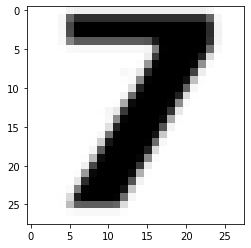

In [8]:
import cv2
from skimage.color import rgb2gray
from skimage.transform import resize

img_rows, img_cols = 28, 28

image_original=cv2.imread(r"C:\Users\rolan\Verny_Rolo\placa_7_bn.png")
image_original_gray = rgb2gray(image_original)
image_original_gray_res = resize(image_original_gray, (28,28))

#image1 = image_original.reshape(367500, 28, 28,1)
#prediction = model.predict(r'C:\Users\vernyjmo\Google Drive\Maestria\5 Cuatrimestre\Reconocimiento de Patrones\Proyecto_Final\Numeros\1.jpg')

#print(prediction)

image_index = 3333
plt.imshow(image_original_gray_res.reshape(28, 28),cmap='Greys')
pred = model.predict(image_original_gray_res.reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

#model.evaluate(x_test, y_test)